<a href="https://colab.research.google.com/github/sairamadithya/biomedical_instument_detection/blob/main/biomedical_instrument_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THE FOLLOWING STEPS ARE INVOLVED IN THE ENTIRE PROCESS OF IMAGE CLASSIFICATION

1.IMPORTING LIBRARIES


2.IMAGE PROCESSING


3.MODEL CREATION

4.MODEL COMPILATION

5.MODEL TRAINING

6.MODEL EVALUATION

7.MODEL PREDICTION


# STEP 1-importing essential libraries

tensorflow is a deep learning framework suitable for applications involving neural networks.

using tensorflow we can build,train,evaluate and predict our neural network.

In [2]:
#importing the essential libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image

In [3]:
train_set='../input/dataset/train'
val_set='../input/dataset/val'
test_set='../input/dataset/test'

# STEP 2-image processing

the imagedatagenerator is used to implement data augmentation. we can process the image as we want and create batches of image data.

check this link for further details:- https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [4]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
validation_datagen= image.ImageDataGenerator(    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)
test_datagen= image.ImageDataGenerator(    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)

the flow_from_directory allow us to use the images availabe in the google colab files section. the dataset contains images of variable size. hence it is essential to reshape them to (224,224). (the input dimensions for pretrained model) 

the batch size is an important parameter which can affect the training time and accuracy. less batch size increases accuracy and training time and vice versa. the batch size is taken as powers of two.

In [5]:
# image addressing
train_generator = train_datagen.flow_from_directory(
    train_set,
    target_size = (224,224),
    batch_size = 8,
    class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(
    val_set,
    target_size = (224,224),
    batch_size = 8,
    shuffle=True,
    class_mode = 'binary')
test_generator = test_datagen.flow_from_directory(
    test_set,
    target_size = (224,224),
    batch_size = 8,
    class_mode = 'binary')

Found 4946 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 126 images belonging to 2 classes.


In [6]:
train_generator.class_indices

{'Normal': 0, 'OSCC': 1}

#STEP 3-model creation 

we are using the pretrained cnn meaning that the cnn is already trained on the imagenet dataset and has the weights stored in it. we are going to customise the model by adding additional layers of our choice(remember more layers can increase parameters leading to overfitting). 

we are using the MobileNetV2 model for this application. this model was developed by google in 2017 and is known for its light memory. this model is ideal for devices with less RAM and processing power like microcomputers and mobiles.

In [28]:
base_for_model = tf.keras.applications.VGG16(weights='imagenet', input_shape=(224,224,3), include_top=False)

input_shape=(224,224,3) => this is the input dimensions of the model. this is the parameter mentioned in the processing part. the 3 refers to the three channels R,G,B

we are training it partially so as to reduce the traning time on the stake of accuracy. (it is better to train model fully for better results)

In [29]:
for layer in base_for_model.layers:
    layer.trainable = False

the sequential of the keras is used to stack the added layers of one's choice

In [30]:
model = Sequential()
model.add(base_for_model) 
model.add(GaussianNoise(0.25)) #to prevent overfitting
model.add(GlobalAveragePooling2D()) #to converge and reduce the parameters
model.add(Dense(512, activation = 'relu')) #hidden layer (relu activation function is suggested for images)
model.add(BatchNormalization()) #to prevent overfitting
model.add(Dense(1, activation='sigmoid')) #output layer
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
gaussian_noise_3 (GaussianNo (None, 7, 7, 512)         0         
_________________________________________________________________
global_average_pooling2d_3 ( (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_205 (Bat (None, 512)               2048      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 513       
Total params: 14,979,905
Trainable params: 264,193
Non-trainable params: 14,715,712
____________________________________

#STEP 4- model compilation

In [31]:
adam= tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam,loss= 'binary_crossentropy', metrics=['accuracy','Precision','Recall','AUC'])

#STEP 5- model training

In [32]:

mp= tf.keras.callbacks.ModelCheckpoint(filepath='mymodel.hdf5', 
                               verbose=2, save_best_only=True)
es= tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.05, patience=3)
callback=[es,mp]

the modelcheckpoint is used to save the best model by saving the model which has the lowest loss

the earlystopping is one of the callbacks used to prevent overfitting. it determines the ideal epoch and halts training at that time with the specified change(min_delta) and (patience) waiting epochs.

TIP- ensure that the gpu (Graphics Processing Unit) is used so as to boost the training speed.

Runtime-> change runtime type -> gpu


In [33]:
history = model.fit(
    train_generator,
    steps_per_epoch=80, #steps_per_epoch= training_images/batch_size= 4946/8<=618
    epochs = 20, #own choice
    validation_data = validation_generator,
    callbacks=callback
)

Epoch 1/20
80/80 [==============================] - 37s 443ms/step - loss: 0.7006 - accuracy: 0.6516 - precision: 0.6578 - recall: 0.6226 - auc: 0.7233 - val_loss: 2.1253 - val_accuracy: 0.4833 - val_precision: 0.9688 - val_recall: 0.3370 - val_auc: 0.7543

Epoch 00001: val_loss improved from inf to 2.12528, saving model to mymodel.hdf5
Epoch 2/20
80/80 [==============================] - 32s 399ms/step - loss: 0.6057 - accuracy: 0.6969 - precision: 0.6958 - recall: 0.7130 - auc: 0.7796 - val_loss: 0.9575 - val_accuracy: 0.6083 - val_precision: 0.8814 - val_recall: 0.5652 - val_auc: 0.6941

Epoch 00002: val_loss improved from 2.12528 to 0.95750, saving model to mymodel.hdf5
Epoch 3/20
80/80 [==============================] - 32s 400ms/step - loss: 0.5297 - accuracy: 0.7516 - precision: 0.7628 - recall: 0.7368 - auc: 0.8249 - val_loss: 0.6708 - val_accuracy: 0.7500 - val_precision: 0.7925 - val_recall: 0.9130 - val_auc: 0.7021

Epoch 00003: val_loss improved from 0.95750 to 0.67084, savi

using earlystopping we were able to train the model within 4 minutes.

In [49]:
print(history.history.keys())
import matplotlib.pyplot as plt
acc=(history.history['accuracy'])
loss=(history.history['loss'])
prc=(history.history['precision'])
rec=(history.history['recall'])
auc=(history.history['auc'])
val_acc=(history.history['val_accuracy'])
val_loss=(history.history['val_loss'])
val_prc=(history.history['val_precision'])
val_rec=(history.history['val_recall'])
val_auc=(history.history['val_auc'])

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc'])


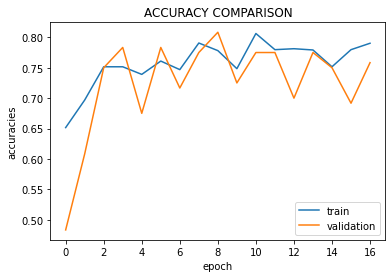

In [38]:
plt.plot(acc)
plt.plot(val_acc)
plt.title('ACCURACY COMPARISON')
plt.xlabel('epoch')
plt.ylabel('accuracies')
plt.title('ACCURACY COMPARISON')
plt.legend(['train','validation'])

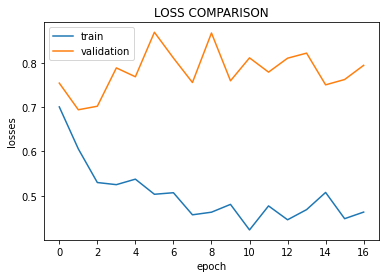

In [39]:
plt.title('LOSS COMPARISON')
plt.plot(loss)
plt.plot(val_loss)
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['train','validation'])

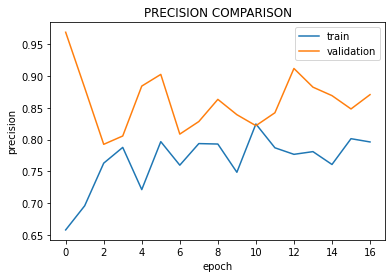

In [50]:
plt.title('PRECISION COMPARISON')
plt.plot(prc)
plt.plot(val_prc)
plt.xlabel('epoch')
plt.ylabel('precision')
plt.legend(['train','validation'])

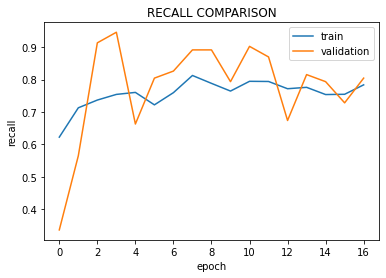

In [51]:
plt.title('RECALL COMPARISON')
plt.plot(rec)
plt.plot(val_rec)
plt.xlabel('epoch')
plt.ylabel('recall')
plt.legend(['train','validation'])

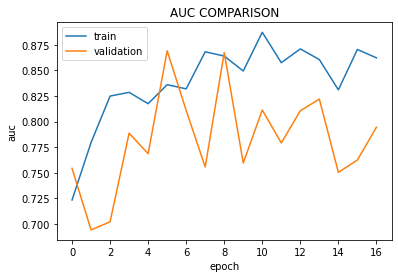

In [52]:
plt.title('AUC COMPARISON')
plt.plot(auc)
plt.plot(val_auc)
plt.xlabel('epoch')
plt.ylabel('auc')
plt.legend(['train','validation'])

#STEP 6- MODEL EVALUATION

In [34]:
model.evaluate(train_generator)

619/619 [==============================] - 155s 250ms/step - loss: 0.3989 - accuracy: 0.8205 - precision: 0.8542 - recall: 0.7794 - auc: 0.9035


[0.3988940417766571,
 0.8204609751701355,
 0.8542121052742004,
 0.7793707847595215,
 0.9035241603851318]

In [35]:
model.evaluate(validation_generator)

15/15 [==============================] - 12s 818ms/step - loss: 0.5262 - accuracy: 0.7583 - precision: 0.9091 - recall: 0.7609 - auc: 0.8137


[0.5261646509170532,
 0.7583333253860474,
 0.9090909361839294,
 0.760869562625885,
 0.8136645555496216]

In [40]:
model.evaluate(test_generator)

16/16 [==============================] - 19s 1s/step - loss: 0.4415 - accuracy: 0.7778 - precision: 0.9036 - recall: 0.7895 - auc: 0.8689


[0.4415014386177063,
 0.7777777910232544,
 0.9036144614219666,
 0.7894737124443054,
 0.8689303398132324]

<AxesSubplot:>

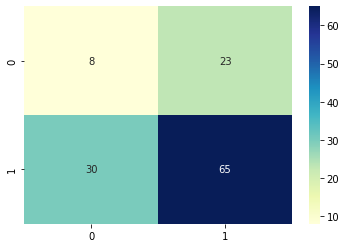

In [41]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
predictions = model.predict(test_generator)
test_generator.classes
cm = confusion_matrix(test_generator.classes, predictions.round())

sns.heatmap(cm,  annot=True, fmt="d" ,cmap="YlGnBu")

In [42]:
from sklearn.metrics import classification_report
print(classification_report(test_generator.classes, predictions.round())) #.argmax(axis=-1)

              precision    recall  f1-score   support

           0       0.21      0.26      0.23        31
           1       0.74      0.68      0.71        95

    accuracy                           0.58       126
   macro avg       0.47      0.47      0.47       126
weighted avg       0.61      0.58      0.59       126



#STEP 7- MODEL PREDICTION

'Squamous Cell Carcinoma'

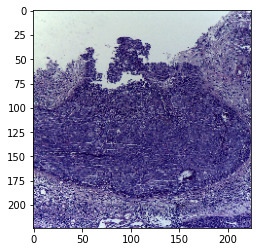

In [47]:
img = image.load_img('../input/dataset/val/OSCC/OSCC_100x_119.jpg',target_size=(224,224))
imaga = image.img_to_array(img)
image = np.expand_dims(imaga,axis=0)  
ypred = model.predict(image)
if ypred<0.5:
      ypred="Normal"
else:
      ypred="Squamous Cell Carcinoma" 
plt.imshow(img)
ypred


The model is giving out good predictions, but the test accuracy (78%) is not satisfactory. This was the best I could do. Deploying other methods like training heavy models like ResNet101 and InceptionResNetV2, increasing the neurons resulted in overfitting. Hence I stopped my work with this!!